*Importing Necessary Libraries*

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

*Loading Dataset*

In [2]:
df=pd.read_csv('Sampled_10k_Clinical_Notes_Dataset_with_Unique_Doctor_s_Notes.csv')
df.head()

,Unnamed: 0,Patient_ID,Age,Gender,Diagnosis,Symptoms,Treatments,Outcome,Date,Doctor's Notes
0,22,8fd83cde-f546-4b6d-88db-06b8717f7def,50,Male,Heart Failure,"Swelling, Cough, Shortness of breath","Diuretics, Insulin therapy, Blood pressure med...",ICU transfer,2022-06-14,Patient is under observation after the procedure.
1,3,a0e30b34-7c82-4c2a-9041-d220cbc2026a,64,Female,Sepsis,"Cough, Vomiting, Nausea","Intravenous fluids, Antibiotics",Improvement,2022-09-14,Patient required intubation for respiratory fa...
2,8,9f204430-fe4e-4ab6-9551-899d56ebddbe,40,Male,Diabetes,"Cough, Dizziness","Blood pressure medication, Insulin therapy, Me...",Deterioration,2024-07-23,Condition improving with physiotherapy.
3,22,8fd83cde-f546-4b6d-88db-06b8717f7def,50,Male,Heart Failure,"Swelling, Cough, Shortness of breath","Diuretics, Insulin therapy, Blood pressure med...",ICU transfer,2022-06-14,"Patient is in critical condition, monitoring c..."
4,2,c010ce10-b587-4733-9c62-93e6172f1dc9,78,Male,Pneumonia,"Fatigue, Fever","Insulin therapy, Antibiotics, Surgical interve...",Stable,2023-08-01,"Signs of infection, adjust treatment regimen."


*Data Preprocessing*

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      10000 non-null  int64 
 1   Patient_ID      10000 non-null  object
 2   Age             10000 non-null  int64 
 3   Gender          10000 non-null  object
 4   Diagnosis       10000 non-null  object
 5   Symptoms        10000 non-null  object
 6   Treatments      10000 non-null  object
 7   Outcome         10000 non-null  object
 8   Date            10000 non-null  object
 9   Doctor's Notes  10000 non-null  object
dtypes: int64(2), object(8)
memory usage: 781.4+ KB


In [4]:
df.columns

Index(['Unnamed: 0', 'Patient_ID', 'Age', 'Gender', 'Diagnosis', 'Symptoms',
       'Treatments', 'Outcome', 'Date', 'Doctor's Notes'],
      dtype='object')

In [5]:
df.describe()

,Unnamed: 0,Age
count,10000.000000,10000.000000
mean,7.164100,57.726400
std,7.560323,18.237845
min,0.000000,27.000000
25%,1.000000,40.000000
50%,3.000000,64.000000
75%,14.000000,78.000000
max,22.000000,80.000000


In [6]:
df.shape

(10000, 10)

*Checking Duplicated Values*

In [7]:
df.duplicated().sum()

9860

In [8]:
df= df.drop_duplicates()

In [43]:
df.duplicated().sum()

0

*Checking Missing Values*

In [9]:
df.isnull().sum()

Unnamed: 0        0
Patient_ID        0
Age               0
Gender            0
Diagnosis         0
Symptoms          0
Treatments        0
Outcome           0
Date              0
Doctor's Notes    0
dtype: int64

*Target Column*

In [10]:
df['Outcome'].value_counts()

Outcome
ICU transfer     40
Improvement      40
Deterioration    40
Stable           20
Name: count, dtype: int64

*Dropping Unneccesary Columns*

In [11]:
# Drop the specified columns
columns_to_drop = ['Unnamed: 0','Patient_ID','Age','Date']  # Replace with the exact column names or indices
df = df.drop(columns=columns_to_drop, errors='ignore')

In [12]:
df.head()

,Gender,Diagnosis,Symptoms,Treatments,Outcome,Doctor's Notes
0,Male,Heart Failure,"Swelling, Cough, Shortness of breath","Diuretics, Insulin therapy, Blood pressure med...",ICU transfer,Patient is under observation after the procedure.
1,Female,Sepsis,"Cough, Vomiting, Nausea","Intravenous fluids, Antibiotics",Improvement,Patient required intubation for respiratory fa...
2,Male,Diabetes,"Cough, Dizziness","Blood pressure medication, Insulin therapy, Me...",Deterioration,Condition improving with physiotherapy.
3,Male,Heart Failure,"Swelling, Cough, Shortness of breath","Diuretics, Insulin therapy, Blood pressure med...",ICU transfer,"Patient is in critical condition, monitoring c..."
4,Male,Pneumonia,"Fatigue, Fever","Insulin therapy, Antibiotics, Surgical interve...",Stable,"Signs of infection, adjust treatment regimen."


*Text Cleaning*

In [13]:
import re
import string
import pandas as pd

import re
import string
import nltk

def wordopt(text_list):
    cleaned_texts = []
    v=nltk.word_tokenize(text_list)
    for text in v:
        # print(text)
        text = text.lower()
        text = re.sub('\[.*?\]', '', text)
        text = re.sub("\\W", " ", text)
        text = re.sub('https?://\S+|www\.\S+', '', text)
        text = re.sub('<.*?>+', '', text)
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        text = re.sub('\n', '', text)
        text = re.sub('\w*\d\w*', '', text)
        cleaned_texts.append(text)
    return cleaned_texts



In [14]:
df["Doctor's Notes"]=df["Doctor's Notes"].apply(wordopt)

In [15]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
corpus = []

for index, row in df.iterrows():
    text_list = row["Doctor's Notes"]
    
    # Join the list of words into a single string
    text = ' '.join(text_list)

    # Remove non-alphabetic characters
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Split the words
    text = text.split()

    # Lemmatize and remove stopwords
    text = [lemmatizer.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]

    # Join the lemmatized words into a single string
    text = ' '.join(text)

    # Append the processed text to the corpus
    corpus.append(text)

# Assign the processed corpus back to the "REviews" column
df["Doctor's Notes"] = corpus


In [16]:
df.head()

,Gender,Diagnosis,Symptoms,Treatments,Outcome,Doctor's Notes
0,Male,Heart Failure,"Swelling, Cough, Shortness of breath","Diuretics, Insulin therapy, Blood pressure med...",ICU transfer,patient observation procedure
1,Female,Sepsis,"Cough, Vomiting, Nausea","Intravenous fluids, Antibiotics",Improvement,patient required intubation respiratory failure
2,Male,Diabetes,"Cough, Dizziness","Blood pressure medication, Insulin therapy, Me...",Deterioration,condition improving physiotherapy
3,Male,Heart Failure,"Swelling, Cough, Shortness of breath","Diuretics, Insulin therapy, Blood pressure med...",ICU transfer,patient critical condition monitoring closely
4,Male,Pneumonia,"Fatigue, Fever","Insulin therapy, Antibiotics, Surgical interve...",Stable,sign infection adjust treatment regimen


*Wordcloud*

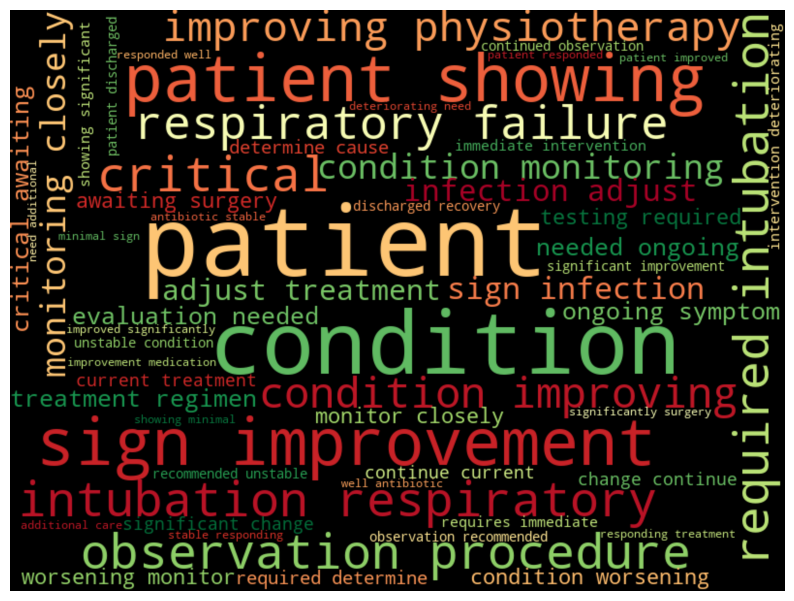

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'RdYlGn', 
                       margin = 0,
                       max_words = 100,  
                       min_word_length = 4,
                       max_font_size = 100, 
                       background_color = 'black').generate(' '.join(corpus))


plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'quadric')
plt.axis('off')
plt.show()

*Saving Cleaned Data*

In [18]:
df.to_csv('cleaned_data.csv',index=False)

df = pd.read_csv('cleaned_data.csv')
df

,Gender,Diagnosis,Symptoms,Treatments,Outcome,Doctor's Notes
0,Male,Heart Failure,"Swelling, Cough, Shortness of breath","Diuretics, Insulin therapy, Blood pressure med...",ICU transfer,patient observation procedure
1,Female,Sepsis,"Cough, Vomiting, Nausea","Intravenous fluids, Antibiotics",Improvement,patient required intubation respiratory failure
2,Male,Diabetes,"Cough, Dizziness","Blood pressure medication, Insulin therapy, Me...",Deterioration,condition improving physiotherapy
3,Male,Heart Failure,"Swelling, Cough, Shortness of breath","Diuretics, Insulin therapy, Blood pressure med...",ICU transfer,patient critical condition monitoring closely
4,Male,Pneumonia,"Fatigue, Fever","Insulin therapy, Antibiotics, Surgical interve...",Stable,sign infection adjust treatment regimen
...,...,...,...,...,...,...
135,Female,Hypertension,"Dizziness, Fever","Mechanical ventilation, Insulin therapy",Improvement,patient showing minimal sign improvement
136,Male,Heart Failure,"Swelling, Cough, Shortness of breath","Diuretics, Insulin therapy, Blood pressure med...",ICU transfer,significant change continue current treatment
137,Male,Heart Failure,"Swelling, Cough, Shortness of breath","Diuretics, Insulin therapy, Blood pressure med...",ICU transfer,sign improvement medication
138,Male,Diabetes,"Cough, Dizziness","Blood pressure medication, Insulin therapy, Me...",Deterioration,significant change continue current treatment


In [19]:
# Converting the Words to Vector using tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(ngram_range=(1,3),max_features=2500)
X=tf.fit_transform(corpus).toarray()
y=df['Outcome']

*Splitting of Data*

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

*Balancing Imbalanced Data*

In [22]:
# from imblearn import under_sampling
# from imblearn.under_sampling import SMOTE
# x_train, y_train = SMOTE().fit_resample(x_train, y_train)
# x_test, y_test = SMOTE().fit_resample(x_test, y_test)

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_train, y_train = rus.fit_resample(x_train, y_train)
x_test, y_test = rus.fit_resample(x_train, y_train)
# lets print the shape of x and y after resampling it
print(x_train.shape)
print(y_train.shape)

(64, 171)
(64,)


In [23]:
y_train.value_counts()

Outcome
Deterioration    16
ICU transfer     16
Improvement      16
Stable           16
Name: count, dtype: int64

*MACHINE LEARNING ALGORITHM*

*Logistics Regression*

In [24]:
# modeling

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
print('*'*20)
# prediction
#x_test_resample, y_test_resample = SMOTE().fit_resample(X_test_vect, y_test)


test_prediction = LR.predict(x_test)
train_prediction = LR.predict(x_train)

#evaluation

print('*'*20)
from sklearn.metrics import accuracy_score, confusion_matrix

print('train_accuracy',accuracy_score(y_train,train_prediction))

print('test_accuracy',accuracy_score(y_test,test_prediction))


print('*'*20)

print(confusion_matrix(y_test,test_prediction))
print(classification_report(test_prediction,y_test))

print('*'*20)


********************
********************
train_accuracy 0.40625
test_accuracy 0.40625
********************
[[6 2 3 5]
 [4 5 3 4]
 [1 3 7 5]
 [2 3 3 8]]
               precision    recall  f1-score   support

Deterioration       0.38      0.46      0.41        13
 ICU transfer       0.31      0.38      0.34        13
  Improvement       0.44      0.44      0.44        16
       Stable       0.50      0.36      0.42        22

     accuracy                           0.41        64
    macro avg       0.41      0.41      0.40        64
 weighted avg       0.42      0.41      0.41        64

********************


*Naive Bayes*

In [25]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
print('*'*20)

train_pred=nb.predict(x_train)
test_pred=nb.predict(x_test)
print('*'*20)
from sklearn.metrics import accuracy_score

accuracy_score(y_test,test_pred)

print('*'*20)
print(classification_report(test_pred,y_test))



********************
********************
********************
               precision    recall  f1-score   support

Deterioration       0.38      0.40      0.39        15
 ICU transfer       0.50      0.40      0.44        20
  Improvement       0.44      0.39      0.41        18
       Stable       0.31      0.45      0.37        11

     accuracy                           0.41        64
    macro avg       0.41      0.41      0.40        64
 weighted avg       0.42      0.41      0.41        64



*Random Forest*

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

print('*'*20)
train_pred=rfc.predict(x_train)

test_pred=rfc.predict(x_test)

print('*'*20)
from sklearn.metrics import accuracy_score

acc=accuracy_score(y_test,test_pred)
print(acc)
print('*'*20)
print(classification_report(test_pred,y_test))


********************
********************
0.40625
********************
               precision    recall  f1-score   support

Deterioration       0.56      0.35      0.43        26
 ICU transfer       0.38      0.43      0.40        14
  Improvement       0.38      0.46      0.41        13
       Stable       0.31      0.45      0.37        11

     accuracy                           0.41        64
    macro avg       0.41      0.42      0.40        64
 weighted avg       0.44      0.41      0.41        64



*Decision Tree*

In [27]:
# modeling

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

print('*'*20)
# prediction

test_prediction = dtc.predict(x_test)
train_prediction = dtc.predict(x_train)

#evaluation

print('*'*20)
from sklearn.metrics import accuracy_score, confusion_matrix

print('train_accuracy',accuracy_score(y_train,train_prediction))

print('test_accuracy',accuracy_score(y_test,test_prediction))

print('*'*20)
print(classification_report(y_test,test_prediction))

********************
********************
train_accuracy 0.40625
test_accuracy 0.40625
********************


               precision    recall  f1-score   support

Deterioration       0.36      0.75      0.49        16
 ICU transfer       0.40      0.50      0.44        16
  Improvement       0.44      0.25      0.32        16
       Stable       1.00      0.12      0.22        16

     accuracy                           0.41        64
    macro avg       0.55      0.41      0.37        64
 weighted avg       0.55      0.41      0.37        64



*MultinominalNB*

In [28]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)

print('*'*20)
train_pred=nb.predict(x_train)
test_pred=nb.predict(x_test)
print('*'*20)
from sklearn.metrics import accuracy_score

accuracy =accuracy_score(y_test,test_pred)
print(accuracy)
print('*'*20)
print(classification_report(train_pred,y_train))
print(classification_report(test_pred,y_test))

********************
********************
0.40625
********************
               precision    recall  f1-score   support

Deterioration       0.38      0.40      0.39        15
 ICU transfer       0.50      0.40      0.44        20
  Improvement       0.44      0.39      0.41        18
       Stable       0.31      0.45      0.37        11

     accuracy                           0.41        64
    macro avg       0.41      0.41      0.40        64
 weighted avg       0.42      0.41      0.41        64

               precision    recall  f1-score   support

Deterioration       0.38      0.40      0.39        15
 ICU transfer       0.50      0.40      0.44        20
  Improvement       0.44      0.39      0.41        18
       Stable       0.31      0.45      0.37        11

     accuracy                           0.41        64
    macro avg       0.41      0.41      0.40        64
 weighted avg       0.42      0.41      0.41        64



*Saving Model*

In [29]:
import pickle
filename = 'vectorizer.pkl'
pickle.dump(tf, open(filename, 'wb'))

In [30]:
import pickle

filename = 'dt_yt.pkl'
pickle.dump(dtc, open(filename, 'wb'))

In [31]:
# import re
# from nltk.stem import WordNetLemmatizer
# import pickle

# # Load vectorizer and model
# vectorizer = pickle.load(open('vectorizer.pkl','rb'))
# mnb = pickle.load(open('dt_yt.pkl','rb'))

# strr = input('Enter Your Message: ')
# print("-------------------------------")
# example_counts = vectorizer.transform([strr])
# prediction = mnb.predict(example_counts)
# print(prediction)

*Training Autoencoder*

In [32]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Use the actual input dimension (65 in this case)
input_dim = x_train.shape[1]

# Redefine the model with the new input dimension
input_layer = Input(shape=(input_dim,))
encoder = Dense(128, activation='relu')(input_layer)
encoder_output = Dense(64, activation='relu')(encoder)

# Decoder
decoder = Dense(128, activation='relu')(encoder_output)
decoder_output = Dense(input_dim, activation='sigmoid')(decoder)

# Autoencoder
autoencoder = Model(inputs=input_layer, outputs=decoder_output)
autoencoder.compile(optimizer=Adam(learning_rate=1e-3), loss='mse')

autoencoder.summary()




Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 171)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        22,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 171)            │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,651 (236.92 KB)

 Trainable params: 60,651 (236.92 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Pretraining parameters
pretrain_epochs = 50
batch_size = 256

# Compile and pretrain the autoencoder (reconstruction only)
autoencoder.compile(optimizer=Adam(learning_rate=1e-3), loss='mse')

# Early stopping and learning rate scheduling
callbacks = [
    EarlyStopping(monitor='loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='loss', factor=0.5, patience=3, min_lr=1e-5)
]

# Train the model
autoencoder.fit(x_train, x_train,
                epochs=pretrain_epochs,
                batch_size=batch_size,
                validation_data=(x_test, x_test),
                callbacks=callbacks)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 0.2366 - val_loss: 0.2354 - learning_rate: 0.0010
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.2354 - val_loss: 0.2340 - learning_rate: 0.0010
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2340 - val_loss: 0.2324 - learning_rate: 0.0010
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.2324 - val_loss: 0.2306 - learning_rate: 0.0010
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2306 - val_loss: 0.2286 - learning_rate: 0.0010
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.2286 - val_loss: 0.2262 - learning_rate: 0.0010
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.2262 - val_loss: 0.2235 - learning_rate: 0.0010
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.2235 - val_loss: 0.2204 - learning_rate: 0.0010
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.2204 - val_loss: 0.2168 - learning_rate: 0.0010
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

*Model Architecture*

In [34]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Layer
from tensorflow.keras.initializers import VarianceScaling
import tensorflow.keras.backend as K

# Parameters
input_dim = x_train.shape[1]  # Ensure input dimension matches your data
encoding_dim = 64
n_clusters = 5

# Encoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(128, activation='relu')(input_layer)
encoder_output = Dense(encoding_dim, activation='relu')(encoder)

# Decoder
decoder = Dense(128, activation='relu')(encoder_output)
decoder_output = Dense(input_dim, activation='sigmoid')(decoder)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder_output)

# Clustering Layer
class ClusteringLayer(Layer):
    def __init__(self, n_clusters, **kwargs):
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters

    def build(self, input_shape):
        self.clusters = self.add_weight(name='clusters',
                                        shape=(self.n_clusters, input_shape[1]),
                                        initializer=VarianceScaling(scale=1.0, mode='fan_in', distribution='normal'),
                                        trainable=True)

    def call(self, inputs, **kwargs):
        q = 1.0 / (1.0 + K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2))
        q /= K.sum(q, axis=1, keepdims=True)
        return q
    

# Build the DEC2Vec model
clustering_layer = ClusteringLayer(n_clusters, name='clustering')(encoder_output)

# ✅ Define the full DEC2Vec model
dec2vec = Model(inputs=input_layer, outputs=[decoder_output, clustering_layer])

import tensorflow.keras.backend as K
import tensorflow as tf

# Custom accuracy metric for clustering
def clustering_accuracy(y_true, y_pred):
    true_labels = K.argmax(y_true, axis=-1)
    pred_labels = K.argmax(y_pred, axis=-1)
    accuracy = K.mean(K.equal(true_labels, pred_labels))
    return accuracy



# Compile the DEC2Vec model with accuracy
dec2vec.compile(optimizer='adam',
                loss=['mse', 'kld'],
                loss_weights=[0.5, 0.5],
                metrics={'clustering': clustering_accuracy})  # ✅ Add accuracy metric
dec2vec.summary()




Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 171)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     22,016 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      8,256 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 128)       │      8,320 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 171)       │     22,059 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clustering          │ (None, 5)         │        320 │ dense_5[0][0]     │
│ (ClusteringLayer)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 60,971 (238.17 KB)

 Trainable params: 60,971 (238.17 KB)

 Non-trainable params: 0 (0.00 B)

*Clustering*

In [35]:
from sklearn.cluster import KMeans

# Extract latent representations
latent_model = Model(inputs=autoencoder.input, outputs=encoder_output)
latent_vectors = latent_model.predict(x_train)

# Apply KMeans clustering
n_clusters = 5  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=42)
y_pred = kmeans.fit_predict(latent_vectors)

from tensorflow.keras.utils import to_categorical

# One-hot encode the KMeans predictions to match the clustering layer's output shape
y_pred_distribution = to_categorical(y_pred, num_classes=n_clusters)


# ✅ Initialize the clustering layer with KMeans centroids
dec2vec.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


*Model Training*

In [36]:
# Fine-tuning parameters
fine_tune_epochs = 100
batch_size = 256

# Fine-tuning with early stopping and learning rate scheduling
callbacks = [
    EarlyStopping(monitor='loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=1e-5)
]

# Train the DEC2Vec model with accuracy displayed
history = dec2vec.fit(
    x_train, [x_train, y_pred_distribution],
    epochs=fine_tune_epochs,
    batch_size=batch_size,
    validation_data=(x_test, [x_test, y_pred_distribution]),
    callbacks=callbacks
)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - clustering_clustering_accuracy: 1.0000 - clustering_loss: 0.7786 - dense_7_loss: 0.1186 - loss: 0.8972 - val_clustering_clustering_accuracy: 0.4844 - val_clustering_loss: 0.7897 - val_dense_7_loss: 0.1182 - val_loss: 0.9079 - learning_rate: 0.0010
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - clustering_clustering_accuracy: 1.0000 - clustering_loss: 0.7743 - dense_7_loss: 0.1182 - loss: 0.8926 - val_clustering_clustering_accuracy: 0.4844 - val_clustering_loss: 0.7878 - val_dense_7_loss: 0.1178 - val_loss: 0.9057 - learning_rate: 0.0010
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - clustering_clustering_accuracy: 1.0000 - clustering_loss: 0.7700 - dense_7_loss: 0.1178 - loss: 0.8878 - val_clustering_clustering_accuracy: 0.4844 - val_clustering_loss: 0.7861 - val_dense_7_loss: 0.1173 - val_loss: 0.9034 - learning_rate: 0.0010
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - clustering_clustering_accuracy: 1.0000 - clusterin

*Evaluating Model*

In [37]:
# Evaluate on test set
test_loss, test_clustering_loss, test_dense_loss, test_clustering_acc = dec2vec.evaluate(
    x_test, [x_test, y_pred_distribution]
)

print(f"Test Clustering Accuracy: {test_clustering_acc:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - clustering_clustering_accuracy: 0.5312 - clustering_loss: 0.6650 - dense_7_loss: 0.0028 - loss: 0.6678 
Test Clustering Accuracy: 0.4844


*Visualizing Accuracy Over Epoch*

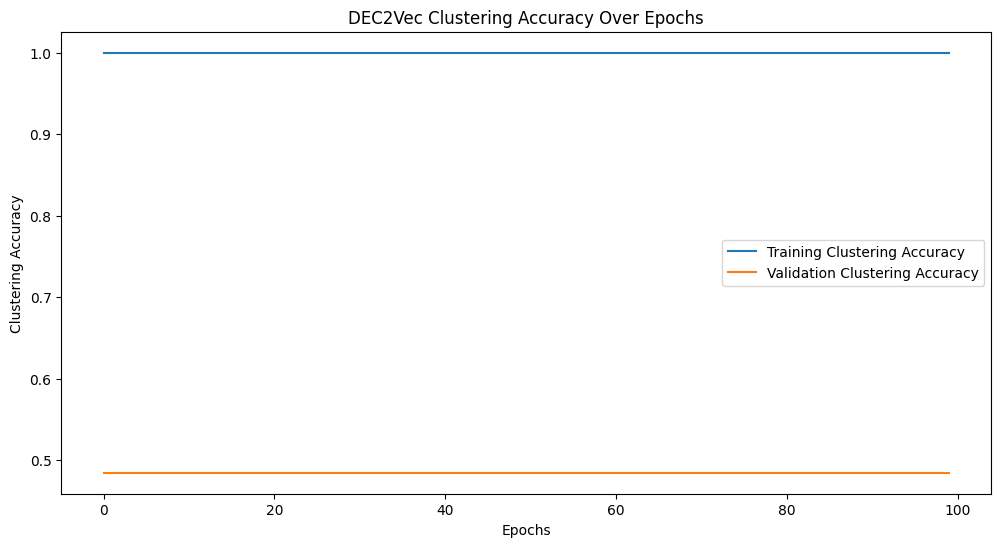

In [38]:
import matplotlib.pyplot as plt

# Plot clustering accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['clustering_clustering_accuracy'], label='Training Clustering Accuracy')
plt.plot(history.history['val_clustering_clustering_accuracy'], label='Validation Clustering Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Clustering Accuracy')
plt.title('DEC2Vec Clustering Accuracy Over Epochs')
plt.legend()
plt.show()


*Final Accuracy*

In [39]:
# Display the final clustering accuracy
final_train_acc = history.history['clustering_clustering_accuracy'][-1]
final_val_acc = history.history['val_clustering_clustering_accuracy'][-1]

print(f"Final Training Clustering Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Clustering Accuracy: {final_val_acc:.4f}")



Final Training Clustering Accuracy: 1.0000
Final Validation Clustering Accuracy: 0.4844


*Saving Model*

In [40]:
# Save the entire DEC2Vec model
dec2vec.save("DEC2Vec_model.h5")

*User's Prediction*

In [4]:
import numpy as np
import pickle
from tensorflow.keras.models import load_model
import pandas as pd
from tensorflow.keras.utils import custom_object_scope
from tensorflow.keras.losses import KLDivergence, MeanSquaredError
from tensorflow.keras.layers import Layer
from tensorflow.keras.initializers import VarianceScaling
import tensorflow.keras.backend as K

# ✅ Clustering Layer Definition
class ClusteringLayer(Layer):
    def __init__(self, n_clusters, **kwargs):
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters

    def build(self, input_shape):
        self.clusters = self.add_weight(name='clusters',
                                        shape=(self.n_clusters, input_shape[1]),
                                        initializer=VarianceScaling(scale=1.0, mode='fan_in', distribution='normal'),
                                        trainable=True)

    def call(self, inputs, **kwargs):
        q = 1.0 / (1.0 + K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2))
        q /= K.sum(q, axis=1, keepdims=True)
        return q

# ✅ Load the TF-IDF vectorizer
with open("vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)

# ✅ Register custom objects
custom_objects = {
    "ClusteringLayer": ClusteringLayer,
    "kld": KLDivergence(),
    "mse": MeanSquaredError()
}

# ✅ Load the DEC2Vec model with custom objects
with custom_object_scope(custom_objects):
    dec2vec_model = load_model("DEC2Vec_model.h5")

# ✅ Class label mapping
label_mapping = {
    0: "Deterioration",
    1: "ICU transfer",
    2: "Improvement",
    3: "Stable"
}

# ✅ Preprocessing function
def preprocess_text(text):
    """Preprocesses text using the TF-IDF vectorizer with consistent shape."""
    text = [text]  
    vector = vectorizer.transform(text).toarray()

    # Ensure the vector shape matches the model's input shape
    target_shape = dec2vec_model.input_shape[1]
    
    if vector.shape[1] != target_shape:
        padded_vector = np.zeros((1, target_shape))
        padded_vector[0, :vector.shape[1]] = vector
        vector = padded_vector

    return vector

# ✅ Prediction function
def predict_outcome(note, diagnosis):
    """Predicts the outcome for the given doctor's note and diagnosis."""
    
    # Combine inputs
    combined_text = f"Note: {note}. Diagnosis: {diagnosis}"
    input_vector = preprocess_text(combined_text)

    # Make predictions
    predictions = dec2vec_model.predict(input_vector)

    # Handle single-output model prediction
    if isinstance(predictions, list):  
        predictions = predictions[1]  # For multi-output models
    else:
        predictions = predictions  # For single-output models

    # Get the predicted cluster index
    predicted_cluster = np.argmax(predictions, axis=-1)[0]

    # Map the cluster index to the label
    predicted_label = label_mapping.get(predicted_cluster, "Unknown")
    
    return predicted_label

# ✅ Get user input
doctor_note = input("Enter the Doctor's Note: ")
diagnosis = input("Enter the Diagnosis: ")

# ✅ Make the prediction
predicted_outcome = predict_outcome(doctor_note, diagnosis)

# ✅ Display the result
print("-------------------------------")
print(f"Predicted Outcome: {predicted_outcome}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
-------------------------------
Predicted Outcome: Stable


In [17]:
import numpy as np
import pickle
from tensorflow.keras.models import load_model
import pandas as pd
from tensorflow.keras.utils import custom_object_scope
from tensorflow.keras.losses import KLDivergence, MeanSquaredError

# ✅ Import your ClusteringLayer definition
from tensorflow.keras.layers import Layer
from tensorflow.keras.initializers import VarianceScaling
import tensorflow.keras.backend as K

# ✅ Define the ClusteringLayer class again
class ClusteringLayer(Layer):
    def __init__(self, n_clusters, **kwargs):
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters

    def build(self, input_shape):
        self.clusters = self.add_weight(name='clusters',
                                        shape=(self.n_clusters, input_shape[1]),
                                        initializer=VarianceScaling(scale=1.0, mode='fan_in', distribution='normal'),
                                        trainable=True)

    def call(self, inputs, **kwargs):
        q = 1.0 / (1.0 + K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2))
        q /= K.sum(q, axis=1, keepdims=True)
        return q

# ✅ Load the TF-IDF vectorizer
with open("vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)

# ✅ Register custom objects: ClusteringLayer + KLD + MSE metric
custom_objects = {
    "ClusteringLayer": ClusteringLayer,
    "kld": KLDivergence(),
    "mse": MeanSquaredError()
}

# ✅ Load the DEC2Vec model with custom objects
with custom_object_scope(custom_objects):
    dec2vec_model = load_model("DEC2Vec_model.h5")

# ✅ Class label mapping
label_mapping = {
    0: "Deterioration",
    1: "ICU transfer",
    2: "Improvement",
    3: "Stable"
}

# ✅ Preprocessing function
def preprocess_text(text):
    """Preprocesses text using the TF-IDF vectorizer with consistent shape."""
    text = [text]  # Convert to list format for vectorizer
    vector = vectorizer.transform(text)

    # ✅ Ensure the vector shape matches the model's input shape
    vector = vector.toarray()

    # Check if the vector shape needs padding
    target_shape = dec2vec_model.input_shape[1]  # Model's input shape (e.g., 65)
    
    if vector.shape[1] != target_shape:
        # Pad with zeros if the input has fewer features
        padded_vector = np.zeros((1, target_shape))
        padded_vector[0, :vector.shape[1]] = vector
        vector = padded_vector

    return vector

# ✅ Prediction function
def predict_outcome(note, diagnosis):
    """Predicts the outcome for the given doctor's note and diagnosis."""
    
    # ✅ Combine Doctor's Note and Diagnosis
    combined_text = f"Note: {note}. Diagnosis: {diagnosis}"

    # Preprocess the input
    input_vector = preprocess_text(combined_text)

    # Make predictions using the DEC2Vec model
    predictions = dec2vec_model.predict(input_vector)

    # Get the predicted cluster index
    predicted_cluster = np.argmax(predictions[1], axis=-1)[0]

    # Map the cluster index to the corresponding label
    predicted_label = label_mapping.get(predicted_cluster, "Unknown")

    return predicted_label

# ✅ Get user input
doctor_note = input("Enter the Doctor's Note: ")
diagnosis = input("Enter the Diagnosis: ")

print("-------------------------------")

# ✅ Make the prediction
predicted_outcome = predict_outcome(doctor_note, diagnosis)

# ✅ Display the result
print(f"Predicted Outcome: {predicted_outcome}")


-------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Predicted Outcome: Deterioration
